<img src="https://www.nyp.edu.sg/content/dam/nyp/logo.png" width='200'/>

Welcome to the lab! Before we get started here are a few pointers on Jupyter notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.


# Lab 3 - Using NVidia Nemo for Speech Recognition

In this exercise, we will learn how to make use of NVidia's NeMo library to help create our Speech Recognition models.

## Section 3.1 - Download / Import The Necessary Modules

Run the following cell to download the datasets, import the necessary modules and set up the folders.

In [2]:
!wget https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/day2-pm/lab3/lab3.zip
!unzip lab3.zip

!pip install soundfile==0.10.3.post1
!pip install omegaconf==2.0.4
!pip install pytorch-lightning==1.0.5
!pip install ruamel.yaml==0.16.12
!pip install ipywebrtc==0.5.0
!pip install ffmpeg-python==0.2.0

BRANCH = 'v1.0.0b2'
!pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]


from helpers import *
print ("Import helpers complete.")

--2020-11-05 00:56:48--  https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/day2-pm/lab3/lab3.zip
Resolving nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)... 52.219.125.59
Connecting to nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)|52.219.125.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105081261 (100M) [application/zip]
Saving to: ‘lab3.zip.1’

lab3.zip.1          100%[===================>] 100.21M  13.9MB/s    in 8.8s    

2020-11-05 00:56:58 (11.4 MB/s) - ‘lab3.zip.1’ saved [105081261/105081261]

Archive:  lab3.zip
replace config/config.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: Requirement already satisfied: soundfile==0.10.3.post1 in /usr/local/lib/python3.6/dist-packages (0.10.3.post1)


[NeMo W 2020-11-05 00:57:40 experimental:28] Module nemo.collections.asr.data.audio_to_text.AudioToCharDataset is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2020-11-05 00:57:40 experimental:28] Module nemo.collections.asr.data.audio_to_text.AudioToBPEDataset is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2020-11-05 00:57:40 experimental:28] Module nemo.collections.asr.data.audio_to_text.AudioLabelDataset is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2020-11-05 00:57:40 experimental:28] Module nemo.collections.asr.data.audio_to_text.TarredAudioToTextDataset is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2020-11-05 00:57:40 experimental:28] Module nemo.collections.asr.data.audio_to_text.TarredAudioToCharDataset is experimental, not ready for production and is not fully supporte

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


[NeMo W 2020-11-05 00:57:42 experimental:28] Module <class 'nemo.collections.asr.losses.ctc.CTCLoss'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2020-11-05 00:57:42 experimental:28] Module <class 'nemo.collections.asr.data.audio_to_text_dali.AudioToCharDALIDataset'> is experimental, not ready for production and is not fully supported. Use at your own risk.


Import helpers complete.


## Section 3.2 - Using a Pre-Trained Nemo Model

Nvidia provides many pre-trained models for English and Chinese. You can find the list available here: https://ngc.nvidia.com/catalog/models/nvidia:nemospeechmodels

The model that we will be using is the 'QuartzNet15x5Base-En' model. The QuartzNet model architecture looks like the following:

<img src="https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/resources/day2-pm/quartznet.png" />

https://arxiv.org/pdf/1910.10261.pdf


According to Nemo's website above, this model has been trained on a large number of speech datasets, including the Singapore National Speech Corpus (English). In theory, this model should work well in recognizing local accents, and you can go ahead to put it to the test!

Update the following cell to pass in the config file's path **"config/config.yaml"** into the first parameter, and the pre-trained model name  **"QuartzNet15x5Base-En"** into the second parameters.

Run the cell to download the pre-trained model from NVidia.

In [ ]:
# TODO:
# Set the path to the configuration file and the model name
# NOTE: The details of the neural network specified in the config file is
#       ignored in this case, because we will be downloading the pre-trained neural network.
#
create_speech_recognition_nemo_model_pretrained("config/config.yaml",  "QuartzNet15x5Base-En")

[NeMo I 2020-11-04 14:53:17 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0b2/QuartzNet15x5Base-En/00869f9c89b8393ca3de640e0c536bd2/QuartzNet15x5Base-En.nemo.
[NeMo I 2020-11-04 14:53:17 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0b2/QuartzNet15x5Base-En/00869f9c89b8393ca3de640e0c536bd2/QuartzNet15x5Base-En.nemo
[NeMo I 2020-11-04 14:53:17 common:399] Instantiating model from pre-trained checkpoint
[NeMo I 2020-11-04 14:53:18 features:241] PADDING: 16
[NeMo I 2020-11-04 14:53:18 features:258] STFT using torch
[NeMo I 2020-11-04 14:53:19 modelPT:257] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.0b2/QuartzNet15x5Base-En/00869f9c89b8393ca3de640e0c536bd2/QuartzNet15x5Base-En.nemo.


## Section 3.3 - Using the Pre-Trained Speech Recognition Model for Transcription

Take a look at the "video.mp4" file in the data folder. It is a video available in the public domain at: https://archive.org/details/GoodEati1951

What we will do now is to extract part of the audio clip from the movie file and send it to our pre-trained speech recognition model to transcribe.

To do so, update the following code to:

1. Set the first parameter for the movie file path to the **"data/video.mp4"** file, 
2. Set the second parameter for the start time (in seconds) of the audio to extract, for example, **0.0**
3. Set the third parameter for the end time (in seconds) of the audio to extract, for example, **120.0**.

See if the transcription using NVidia's Speech Recognition model look reasonable based on what you heard from the video.

In [ ]:
# TODO:
# Update the parameters to specify the movie file, and the audio start/end to
# transcribe.
#
perform_transcription_on_file(extract_audio_clip(
    "data/video.mp4",            # Path to the movie file.
    0.0,              # Start time of audio (in seconds)
    120.0))             # End time of audio (in seconds)

[MoviePy] Writing audio in data/output.wav


100%|██████████| 961/961 [00:00<00:00, 1437.15it/s]

[MoviePy] Done.


Audio transcription as: the ar poo eo on aecte oicit's fun to eat supper with your family especially when there is good food on the table mong healthy bodies they are good foods to eat father is certainly enjoying his supper so is carol so is mother just look at that plate aren't you feeling well bill aren't you hungry what can be the matter after supper it sun the play a while before bed but there's still something wrong isn't there bill in a moment you will know what it is yes bill you're getting a stomach ache you have a stomach ache it isn't any fun to play there it is again poor bill what now we'll soon know because here comes mother mother can tell right away that bill isn't feeling well so what happens next yes bill's put to bed to get some rest now why does bill have a stomach ache he didn't eat anything bad today did he


Now, we are going to try using a recording to test our pre-trained Speech Recognition model. 

Run the following cell to display an audio recorder panel. 

In [ ]:
display_audio_recorder()

Then, update the cell below to pass in the **save_recorded_audio()** function into the perform_transcription_on_file() function.

This has the effect of converting the recorded audio into a WAV format and then sending it into the Nemo speech recognition model.

Take a look at the output transcription and see if it matches to what you said.

In [ ]:
# TODO:
# Pass the function 'save_recorded_audio()' into the parameter but without
# the single quotation marks "'"
#
perform_transcription_on_file(save_recorded_audio())

Audio transcription as: i need to go to work tomorrow


## Section 3.4 - Processing Our Custom AN4 Dataset

Let's assume that we want to train our own custom speech recognition model that can help us recognize people spelling out words and saying numbers. There is an existing dataset, called the AN4 dataset, that contains a collection of audio files of people spelling persons' names, cities and states, or speaking out numbers, or simple words. This dataset was developed by Carnegie Mellon University for research purposes, and is available here: http://www.speech.cs.cmu.edu/databases/an4/

We have already downloaded the AN4 dataset from the link above and set it up in your Virtual Machine in the **"data/an4"** folder. 

The CMU's AN4 dataset contains audio files recorded in the SPH format. But Nemo only recognizes WAV formats, so we need to first load all the SPH files and individually convert them to the WAV format.

Update the following code by passing in the "folder" variable that we declared above.

In [ ]:
# TODO:
# Update the code below to pass in the folder path containing 
# all our SPH files.
#
convert_sph_files_to_wav("data/an4")

data/an4/wav/an4test_clstk/marh/cen4-marh-b.sph
data/an4/wav/an4test_clstk/marh/an434-marh-b.sph
data/an4/wav/an4test_clstk/marh/an431-marh-b.sph
data/an4/wav/an4test_clstk/marh/an432-marh-b.sph
data/an4/wav/an4test_clstk/marh/an433-marh-b.sph
data/an4/wav/an4test_clstk/marh/cen5-marh-b.sph
data/an4/wav/an4test_clstk/marh/cen2-marh-b.sph
data/an4/wav/an4test_clstk/marh/cen6-marh-b.sph
data/an4/wav/an4test_clstk/marh/cen7-marh-b.sph
data/an4/wav/an4test_clstk/marh/an435-marh-b.sph
data/an4/wav/an4test_clstk/marh/cen8-marh-b.sph
data/an4/wav/an4test_clstk/marh/cen3-marh-b.sph
data/an4/wav/an4test_clstk/marh/cen1-marh-b.sph
data/an4/wav/an4test_clstk/mdms2/cen5-mdms2-b.sph
data/an4/wav/an4test_clstk/mdms2/cen6-mdms2-b.sph
data/an4/wav/an4test_clstk/mdms2/cen2-mdms2-b.sph
data/an4/wav/an4test_clstk/mdms2/cen1-mdms2-b.sph
data/an4/wav/an4test_clstk/mdms2/cen4-mdms2-b.sph
data/an4/wav/an4test_clstk/mdms2/an404-mdms2-b.sph
data/an4/wav/an4test_clstk/mdms2/an403-mdms2-b.sph
data/an4/wav/an4tes

## Section 3.5 - Exploring Our Data

Let's take a look at one of the files that we have converted and see how an audio waveform looks like. This is the sound of a person saying the letters "G L E N N".

In [ ]:
audio_file = 'data/an4/wav/an4_clstk/mgah/cen2-mgah-b.wav'
playback_audio(audio_file)


The following shows how the waveform actually looks like when plotted in a graph. If the audio recording contains distinct words or letters with pauses in between, you will be able to see large segments of "pertubations" where the speaker is speaking, and flat lines when the speaker makes short pauses. The "pertubations" represents vibrations as the sound wave travels through air and gets picked up by the microphone or our ear. 

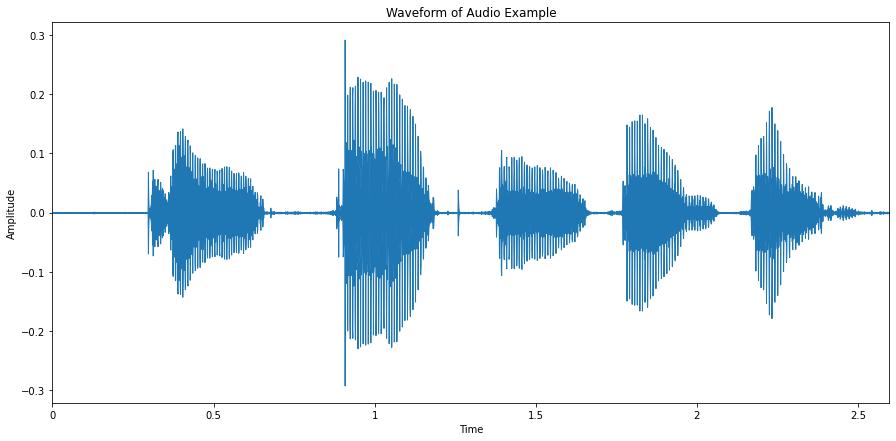

In [ ]:
display_audio_waveform(audio_file)

A spectrogram is a signal processing technique that converts a signal like an audio waveform above into its time-frequency components. Let's take a look at how that piece of audio looks like as a spectrogram. 

It tells you, at each time step, which frequencies (or the pitch / tune) are "playing".  

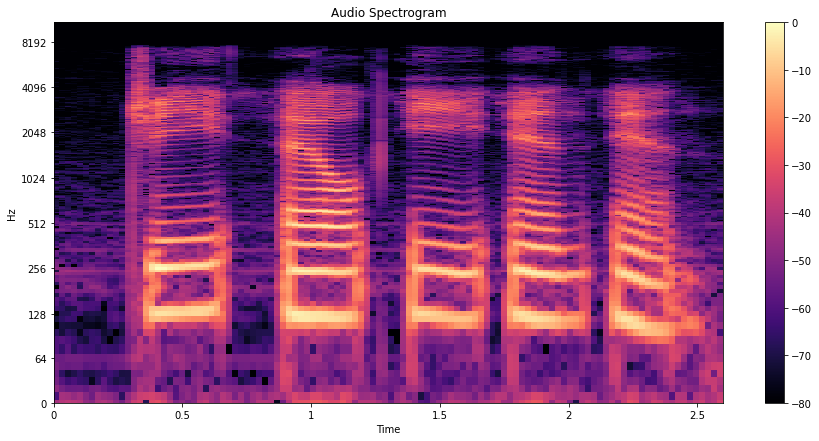

In [ ]:
display_audio_spectrogram(audio_file)

Then, see how the same piece of audio looks like when the y-axis (the frequency axis) is mel-scaled. A mel-scale is a scale of pitches where human listeners perceive them to be "equally" spaced from each other. Interesting fact, the word "mel" actually comes from the word "melody".

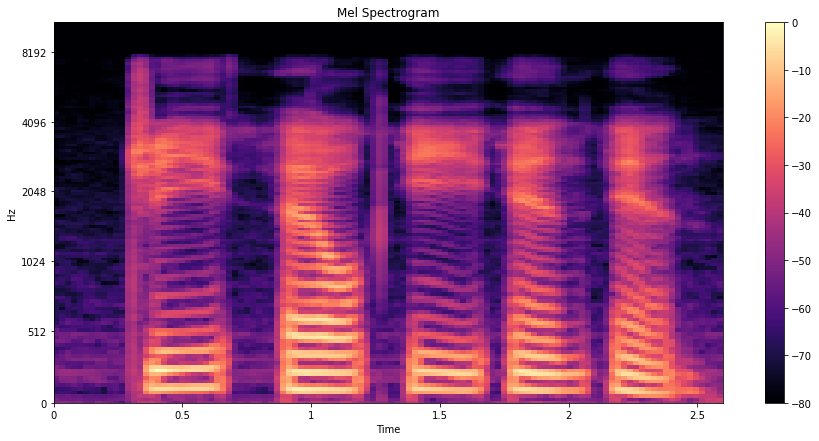

In [ ]:
display_audio_mel_spectrogram(audio_file)

## Section 3.6 - Generating Our Manifest Files From AN4

To train the Nemo model, we must prepare our training and test dataset with manifest files that indicates where to find the audio files, and what the correct transcriptions for each file is. 

The following cell below lists all the audio files, loads up all the transcripts and then generates the manifest file in the format that is required by the Nemo toolkit.

The original AN4 transcriptions look like this:

```
    <s> YES </s> (an251-fash-b)
    <s> GO </s> (an253-fash-b)
    <s> YES </s> (an254-fash-b)
```

We will have to convert it to the manifest required by Nemo in the following format:

```
    {"audio_filepath": "data/an4/wav/an4_clstk\\fash\\an251-fash-b.wav", "duration": 1.0, "text": "yes"}
    {"audio_filepath": "data/an4/wav/an4_clstk\\fash\\an253-fash-b.wav", "duration": 0.7, "text": "go"}
    {"audio_filepath": "data/an4/wav/an4_clstk\\fash\\an254-fash-b.wav", "duration": 0.9, "text": "yes"}
```

Update the cell below with the folders to original AN4 transcript files, the folders to the audio files, and the output Nemo manifest file. 

*Training Dataset:*

- Transcript file is at **"data/an4/etc/an4_train.transcription"**
- The WAV folder is at **"data/an4/wav/an4_clstk"**
- Output file is at **"data/train_manifest"**

*Test Dataset:*

- Transcript file is at **"data/an4/etc/an4_test.transcription"**
- The WAV folder is at **"data/an4/wav/an4test_clstk"**
- Output file is at **"data/test_manifest"**

When you are done, run the cell.

In [ ]:
# This constructs the manifest for the training data set.
#
# TODO: Update the code below to indicate where our transcripts, WAV files, and
#       and where we should save the manifest file.
#
build_manifest_for_an4_dataset('data/an4/etc/an4_train.transcription','data/an4/wav/an4_clstk', 'data/train_manifest')
print("Training manifest created.")

# This constructs the manifest for the test data set.
#
# TODO: Update the code below to indicate where our transcripts, WAV files, and
#       and where we should save the manifest file.
#
build_manifest_for_an4_dataset('data/an4/etc/an4_test.transcription','data/an4/wav/an4test_clstk', 'data/test_manifest')
print("Test manifest created.")

print("Completed.")

Training manifest created.
Test manifest created.
Completed.


## Section 3.7 - Training a Model from Scratch

Training an Automatic Speech Recognition model takes a lot of time. Fortunately, the AN4 dataset is small enough for us to train our model quickly for demonstration purposes.

Update the parameters to indicate where to load the model's configuration file (configured to use a Jasper architecture), the training data and validation data manifest files.

The Jasper architecture looks like the following:

<img src="https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/resources/day2-pm/jasper.png" />

https://arxiv.org/pdf/1904.03288.pdf


In [ ]:
# TODO:
# Update the paths to the configuration file, the training and test manifest files.
#
create_speech_recognition_nemo_model('config/config.yaml', 'data/train_manifest', 'data/test_manifest')

[NeMo I 2020-11-04 15:15:45 collections:173] Dataset loaded with 948 files totalling 0.71 hours
[NeMo I 2020-11-04 15:15:45 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:15:45 collections:173] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2020-11-04 15:15:45 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:15:45 features:241] PADDING: 16
[NeMo I 2020-11-04 15:15:45 features:258] STFT using torch


Update the batch size below to **8** and the number of epochs to **30**. 

Smaller batch sizes in training allow your model to converge quickly, but take slightly longer to train per epoch. Large batch sizes run quicker, but your model converges slower.

Then, run the cell below to see how the training happens. 

If you run this with Jupyter Notebook (not Jupyter Lab), you will be able to see the training loss and the training progresses. Pay attention to the reducing loss as the training continues. Typically, for a good Speech Recognition model in Nemo for this AN4 dataset, the loss should be about 10 or below. The lower the loss, the better the prediction confidence.  

If you are in Jupyter Lab, you may not be able to see the training loss, so just wait for all the training epochs to complete.

In [ ]:
# TODO:
# Adjust the batch size between 4, 8, or 16, and set the number of epochs to 30.
# 
train_speech_recognition_nemo_model(
    8,                                   # Batch size
    1,                                   # Number of GPUs
    30)                                   # Max number of epochs

[NeMo I 2020-11-04 15:19:12 collections:173] Dataset loaded with 948 files totalling 0.71 hours
[NeMo I 2020-11-04 15:19:12 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:19:12 collections:173] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2020-11-04 15:19:12 collections:174] 0 files were filtered totalling 0.00 hours


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[NeMo I 2020-11-04 15:19:12 modelPT:597] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.5]
        eps: 1e-08
        grad_averaging: False
        lr: 0.01
        weight_decay: 0.001
    )


[NeMo W 2020-11-04 15:19:12 lr_scheduler:542] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !

  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConvASREncoder                    | 1 M   
2 | decoder           | ConvASRDecoder                    | 29 K  
3 | loss              | CTCLoss                           | 0     
4 | spec_augmentation | SpectrogramAugmentation           | 0     
5 | _wer              | WER                               | 0     


[NeMo I 2020-11-04 15:19:13 wer:159] 
    
[NeMo I 2020-11-04 15:19:13 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:13 wer:161] decoded  :rot e  fthree nne
[NeMo I 2020-11-04 15:19:13 wer:159] 
    
[NeMo I 2020-11-04 15:19:13 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:13 wer:161] decoded  :  n  s 


[NeMo I 2020-11-04 15:19:13 wer:159] 
    
[NeMo I 2020-11-04 15:19:13 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:13 wer:161] decoded  :ri tix   f three nine
[NeMo I 2020-11-04 15:19:13 wer:159] 
    
[NeMo I 2020-11-04 15:19:13 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:19:13 wer:161] decoded  :   i n
[NeMo I 2020-11-04 15:19:14 wer:159] 
    
[NeMo I 2020-11-04 15:19:14 wer:160] reference:j p e g four
[NeMo I 2020-11-04 15:19:14 wer:161] decoded  :e  four
[NeMo I 2020-11-04 15:19:14 wer:159] 
    
[NeMo I 2020-11-04 15:19:14 wer:160] reference:three three one oh one eight eight
[NeMo I 2020-11-04 15:19:14 wer:161] decoded  :  ne  ne eight eight
[NeMo I 2020-11-04 15:19:14 wer:159] 
    
[NeMo I 2020-11-04 15:19:14 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:14 wer:161] decoded  : n  s s
[NeMo I 2020-11-04 15:19:14 wer:159] 
    
[NeMo I 2020-11-04 15:19:14 wer:160] reference:x n k u eight
[NeMo I 2020-11-04 15:19:14 wer:161] decoded 

[NeMo I 2020-11-04 15:19:15 wer:159] 
    
[NeMo I 2020-11-04 15:19:15 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:15 wer:161] decoded  :ruutc ee  three nine
[NeMo I 2020-11-04 15:19:16 wer:159] 
    
[NeMo I 2020-11-04 15:19:16 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:16 wer:161] decoded  :aa n e sr 
[NeMo I 2020-11-04 15:19:16 wer:159] 
    
[NeMo I 2020-11-04 15:19:16 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:16 wer:161] decoded  :rgh seveenineten  sixty sevn
[NeMo I 2020-11-04 15:19:16 wer:159] 
    
[NeMo I 2020-11-04 15:19:16 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:16 wer:161] decoded  :i e r s
[NeMo I 2020-11-04 15:19:16 wer:159] 
    
[NeMo I 2020-11-04 15:19:16 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:16 wer:161] decoded  :four one to to six eight  four on four wo
[NeMo I 2020-11-04 15:19:16 wer:159] 
    
[NeMo I 2020-11-04 15:19:16 wer:1

[NeMo I 2020-11-04 15:19:18 wer:159] 
    
[NeMo I 2020-11-04 15:19:18 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:18 wer:161] decoded  :route e  thre nine
[NeMo I 2020-11-04 15:19:18 wer:159] 
    
[NeMo I 2020-11-04 15:19:18 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:18 wer:161] decoded  :e a n e s 
[NeMo I 2020-11-04 15:19:19 wer:159] 
    
[NeMo I 2020-11-04 15:19:19 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:19 wer:161] decoded  :bgh seven neten sixty seon
[NeMo I 2020-11-04 15:19:19 wer:159] 
    
[NeMo I 2020-11-04 15:19:19 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:19 wer:161] decoded  : e r s
[NeMo I 2020-11-04 15:19:19 wer:159] 
    
[NeMo I 2020-11-04 15:19:19 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:19 wer:161] decoded  :four one to two six eight four one four two
[NeMo I 2020-11-04 15:19:19 wer:159] 
    
[NeMo I 2020-11-04 15:19:19 wer:160]

[NeMo I 2020-11-04 15:19:21 wer:159] 
    
[NeMo I 2020-11-04 15:19:21 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:21 wer:161] decoded  :rubo t ne   thre nine
[NeMo I 2020-11-04 15:19:21 wer:159] 
    
[NeMo I 2020-11-04 15:19:21 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:21 wer:161] decoded  : a n en sir 
[NeMo I 2020-11-04 15:19:21 wer:159] 
    
[NeMo I 2020-11-04 15:19:21 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:21 wer:161] decoded  :igh sevivenneten sixty sevin
[NeMo I 2020-11-04 15:19:21 wer:159] 
    
[NeMo I 2020-11-04 15:19:21 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:21 wer:161] decoded  :iye r s
[NeMo I 2020-11-04 15:19:21 wer:159] 
    
[NeMo I 2020-11-04 15:19:21 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:21 wer:161] decoded  :four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:22 wer:159] 
    
[NeMo I 2020-11-04 15:19:22

[NeMo I 2020-11-04 15:19:24 wer:159] 
    
[NeMo I 2020-11-04 15:19:24 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:24 wer:161] decoded  :ruoht see ne e  three nine
[NeMo I 2020-11-04 15:19:24 wer:159] 
    
[NeMo I 2020-11-04 15:19:24 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:24 wer:161] decoded  :evea n ee sis 
[NeMo I 2020-11-04 15:19:24 wer:159] 
    
[NeMo I 2020-11-04 15:19:24 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:24 wer:161] decoded  :gh sevvhen eneten sixty sevn
[NeMo I 2020-11-04 15:19:24 wer:159] 
    
[NeMo I 2020-11-04 15:19:24 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:24 wer:161] decoded  :o e r s
[NeMo I 2020-11-04 15:19:24 wer:159] 
    
[NeMo I 2020-11-04 15:19:24 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:24 wer:161] decoded  :four one tswo two six eight four oney four two
[NeMo I 2020-11-04 15:19:24 wer:159] 
    
[NeMo I 2020-11-04

[NeMo I 2020-11-04 15:19:26 wer:159] 
    
[NeMo I 2020-11-04 15:19:26 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:26 wer:161] decoded  :rlout    three nin
[NeMo I 2020-11-04 15:19:26 wer:159] 
    
[NeMo I 2020-11-04 15:19:26 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:26 wer:161] decoded  : n n s 
[NeMo I 2020-11-04 15:19:26 wer:159] 
    
[NeMo I 2020-11-04 15:19:26 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:26 wer:161] decoded  :irh seven igeten sixty sevn
[NeMo I 2020-11-04 15:19:27 wer:159] 
    
[NeMo I 2020-11-04 15:19:27 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:27 wer:161] decoded  : ye r s
[NeMo I 2020-11-04 15:19:27 wer:159] 
    
[NeMo I 2020-11-04 15:19:27 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:27 wer:161] decoded  :for one two  two six eight fourone for two
[NeMo I 2020-11-04 15:19:27 wer:159] 
    
[NeMo I 2020-11-04 15:19:27 wer:160] r

[NeMo I 2020-11-04 15:19:29 wer:159] 
    
[NeMo I 2020-11-04 15:19:29 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:29 wer:161] decoded  :rulu te n e thre nine
[NeMo I 2020-11-04 15:19:29 wer:159] 
    
[NeMo I 2020-11-04 15:19:29 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:29 wer:161] decoded  :a n e tss 
[NeMo I 2020-11-04 15:19:29 wer:159] 
    
[NeMo I 2020-11-04 15:19:29 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:29 wer:161] decoded  :irgh seveningeten sixty sn
[NeMo I 2020-11-04 15:19:29 wer:159] 
    
[NeMo I 2020-11-04 15:19:29 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:29 wer:161] decoded  :i e r s
[NeMo I 2020-11-04 15:19:29 wer:159] 
    
[NeMo I 2020-11-04 15:19:29 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:29 wer:161] decoded  :four onetwo  two six eightfour one four two
[NeMo I 2020-11-04 15:19:29 wer:159] 
    
[NeMo I 2020-11-04 15:19:29 wer:

[NeMo I 2020-11-04 15:19:31 wer:159] 
    
[NeMo I 2020-11-04 15:19:31 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:31 wer:161] decoded  :rioutc  e  thre nine
[NeMo I 2020-11-04 15:19:31 wer:159] 
    
[NeMo I 2020-11-04 15:19:31 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:31 wer:161] decoded  :a n e s 
[NeMo I 2020-11-04 15:19:32 wer:159] 
    
[NeMo I 2020-11-04 15:19:32 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:32 wer:161] decoded  :rh seven inineten sixty sevn
[NeMo I 2020-11-04 15:19:32 wer:159] 
    
[NeMo I 2020-11-04 15:19:32 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:32 wer:161] decoded  :iy e r s
[NeMo I 2020-11-04 15:19:32 wer:159] 
    
[NeMo I 2020-11-04 15:19:32 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:32 wer:161] decoded  :four one wo two six eight fourone four two
[NeMo I 2020-11-04 15:19:32 wer:159] 
    
[NeMo I 2020-11-04 15:19:32 wer:1

[NeMo I 2020-11-04 15:19:34 wer:159] 
    
[NeMo I 2020-11-04 15:19:34 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:34 wer:161] decoded  :u t   thre nin e
[NeMo I 2020-11-04 15:19:34 wer:159] 
    
[NeMo I 2020-11-04 15:19:34 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:34 wer:161] decoded  : a n  s 
[NeMo I 2020-11-04 15:19:34 wer:159] 
    
[NeMo I 2020-11-04 15:19:34 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:34 wer:161] decoded  :r  seven ige ten six ty se
[NeMo I 2020-11-04 15:19:34 wer:159] 
    
[NeMo I 2020-11-04 15:19:34 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:34 wer:161] decoded  : e r s
[NeMo I 2020-11-04 15:19:34 wer:159] 
    
[NeMo I 2020-11-04 15:19:34 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:34 wer:161] decoded  :four one swo two six eight  four one four wo
[NeMo I 2020-11-04 15:19:34 wer:159] 
    
[NeMo I 2020-11-04 15:19:34 wer:160] re

[NeMo I 2020-11-04 15:19:36 wer:159] 
    
[NeMo I 2020-11-04 15:19:36 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:36 wer:161] decoded  :lf l e  thre nine
[NeMo I 2020-11-04 15:19:36 wer:159] 
    
[NeMo I 2020-11-04 15:19:36 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:36 wer:161] decoded  : a n e sr 
[NeMo I 2020-11-04 15:19:36 wer:159] 
    
[NeMo I 2020-11-04 15:19:36 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:36 wer:161] decoded  :rc seven ne en  sixty sen
[NeMo I 2020-11-04 15:19:37 wer:159] 
    
[NeMo I 2020-11-04 15:19:37 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:37 wer:161] decoded  : e r s
[NeMo I 2020-11-04 15:19:37 wer:159] 
    
[NeMo I 2020-11-04 15:19:37 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:37 wer:161] decoded  :four one two  two six eight for ony four two
[NeMo I 2020-11-04 15:19:37 wer:159] 
    
[NeMo I 2020-11-04 15:19:37 wer:160] 

[NeMo I 2020-11-04 15:19:39 wer:159] 
    
[NeMo I 2020-11-04 15:19:39 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:39 wer:161] decoded  :uloute e  the nine
[NeMo I 2020-11-04 15:19:39 wer:159] 
    
[NeMo I 2020-11-04 15:19:39 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:39 wer:161] decoded  :a n e s s
[NeMo I 2020-11-04 15:19:39 wer:159] 
    
[NeMo I 2020-11-04 15:19:39 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:39 wer:161] decoded  :rxh sevennineten sixty sen
[NeMo I 2020-11-04 15:19:39 wer:159] 
    
[NeMo I 2020-11-04 15:19:39 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:39 wer:161] decoded  :v e r s
[NeMo I 2020-11-04 15:19:39 wer:159] 
    
[NeMo I 2020-11-04 15:19:39 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:39 wer:161] decoded  :fourtoneto  two six eight fourone fortwo
[NeMo I 2020-11-04 15:19:39 wer:159] 
    
[NeMo I 2020-11-04 15:19:39 wer:160] re

[NeMo I 2020-11-04 15:19:41 wer:159] 
    
[NeMo I 2020-11-04 15:19:41 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:41 wer:161] decoded  :rul t e  thre nine
[NeMo I 2020-11-04 15:19:41 wer:159] 
    
[NeMo I 2020-11-04 15:19:41 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:41 wer:161] decoded  :a n  s 
[NeMo I 2020-11-04 15:19:42 wer:159] 
    
[NeMo I 2020-11-04 15:19:42 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:42 wer:161] decoded  :rc seven nineten sixty sen
[NeMo I 2020-11-04 15:19:42 wer:159] 
    
[NeMo I 2020-11-04 15:19:42 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:42 wer:161] decoded  : e r s
[NeMo I 2020-11-04 15:19:42 wer:159] 
    
[NeMo I 2020-11-04 15:19:42 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:42 wer:161] decoded  :four one two two six eight  four one four two
[NeMo I 2020-11-04 15:19:42 wer:159] 
    
[NeMo I 2020-11-04 15:19:42 wer:160] 

[NeMo I 2020-11-04 15:19:44 wer:159] 
    
[NeMo I 2020-11-04 15:19:44 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:44 wer:161] decoded  :ruut     three nin
[NeMo I 2020-11-04 15:19:44 wer:159] 
    
[NeMo I 2020-11-04 15:19:44 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:44 wer:161] decoded  :  n  s 
[NeMo I 2020-11-04 15:19:44 wer:159] 
    
[NeMo I 2020-11-04 15:19:44 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:44 wer:161] decoded  :rh sevenneteen sixty sen
[NeMo I 2020-11-04 15:19:44 wer:159] 
    
[NeMo I 2020-11-04 15:19:44 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:44 wer:161] decoded  :  e r s
[NeMo I 2020-11-04 15:19:44 wer:159] 
    
[NeMo I 2020-11-04 15:19:44 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:44 wer:161] decoded  :four one two  two six eight four one four two
[NeMo I 2020-11-04 15:19:44 wer:159] 
    
[NeMo I 2020-11-04 15:19:44 wer:160] r

[NeMo I 2020-11-04 15:19:46 wer:159] 
    
[NeMo I 2020-11-04 15:19:46 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:46 wer:161] decoded  :r lut   e f thre nine
[NeMo I 2020-11-04 15:19:47 wer:159] 
    
[NeMo I 2020-11-04 15:19:47 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:47 wer:161] decoded  : a n es sr 
[NeMo I 2020-11-04 15:19:47 wer:159] 
    
[NeMo I 2020-11-04 15:19:47 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:47 wer:161] decoded  :rh seven nineten sixty sevn
[NeMo I 2020-11-04 15:19:47 wer:159] 
    
[NeMo I 2020-11-04 15:19:47 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:47 wer:161] decoded  : e r s
[NeMo I 2020-11-04 15:19:47 wer:159] 
    
[NeMo I 2020-11-04 15:19:47 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:47 wer:161] decoded  :four one two  two six eight  four one four two
[NeMo I 2020-11-04 15:19:47 wer:159] 
    
[NeMo I 2020-11-04 15:19:47 

[NeMo I 2020-11-04 15:19:49 wer:159] 
    
[NeMo I 2020-11-04 15:19:49 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:49 wer:161] decoded  :r ul tl   three nin
[NeMo I 2020-11-04 15:19:49 wer:159] 
    
[NeMo I 2020-11-04 15:19:49 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:49 wer:161] decoded  :a n  s a
[NeMo I 2020-11-04 15:19:49 wer:159] 
    
[NeMo I 2020-11-04 15:19:49 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:49 wer:161] decoded  :r  seven nineten sixty sevn
[NeMo I 2020-11-04 15:19:49 wer:159] 
    
[NeMo I 2020-11-04 15:19:49 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:49 wer:161] decoded  : e r s
[NeMo I 2020-11-04 15:19:49 wer:159] 
    
[NeMo I 2020-11-04 15:19:49 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:49 wer:161] decoded  :four one two  two six eight  fourone four wo
[NeMo I 2020-11-04 15:19:50 wer:159] 
    
[NeMo I 2020-11-04 15:19:50 wer:160

[NeMo I 2020-11-04 15:19:52 wer:159] 
    
[NeMo I 2020-11-04 15:19:52 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:52 wer:161] decoded  :uout   h nin
[NeMo I 2020-11-04 15:19:52 wer:159] 
    
[NeMo I 2020-11-04 15:19:52 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:52 wer:161] decoded  :a n  s 
[NeMo I 2020-11-04 15:19:52 wer:159] 
    
[NeMo I 2020-11-04 15:19:52 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:52 wer:161] decoded  :rchseven neten sixty sevn
[NeMo I 2020-11-04 15:19:52 wer:159] 
    
[NeMo I 2020-11-04 15:19:52 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:52 wer:161] decoded  :y e r s
[NeMo I 2020-11-04 15:19:52 wer:159] 
    
[NeMo I 2020-11-04 15:19:52 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:52 wer:161] decoded  :four one to two sixeight four ony fur two
[NeMo I 2020-11-04 15:19:52 wer:159] 
    
[NeMo I 2020-11-04 15:19:52 wer:160] reference:

[NeMo I 2020-11-04 15:19:54 wer:159] 
    
[NeMo I 2020-11-04 15:19:54 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:54 wer:161] decoded  :ruoutgm e  three nine
[NeMo I 2020-11-04 15:19:54 wer:159] 
    
[NeMo I 2020-11-04 15:19:54 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:54 wer:161] decoded  :vva n e s 
[NeMo I 2020-11-04 15:19:54 wer:159] 
    
[NeMo I 2020-11-04 15:19:54 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:54 wer:161] decoded  :rh seven ne teen sixty sen
[NeMo I 2020-11-04 15:19:55 wer:159] 
    
[NeMo I 2020-11-04 15:19:55 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:55 wer:161] decoded  :y ye r s
[NeMo I 2020-11-04 15:19:55 wer:159] 
    
[NeMo I 2020-11-04 15:19:55 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:55 wer:161] decoded  :four one two  two six eight four one four two
[NeMo I 2020-11-04 15:19:55 wer:159] 
    
[NeMo I 2020-11-04 15:19:55 w

[NeMo I 2020-11-04 15:19:57 wer:159] 
    
[NeMo I 2020-11-04 15:19:57 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:57 wer:161] decoded  :r ul tgm    thre nine
[NeMo I 2020-11-04 15:19:57 wer:159] 
    
[NeMo I 2020-11-04 15:19:57 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:57 wer:161] decoded  : a n  s a
[NeMo I 2020-11-04 15:19:57 wer:159] 
    
[NeMo I 2020-11-04 15:19:57 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:19:57 wer:161] decoded  :r c seven nineten sixty sevn
[NeMo I 2020-11-04 15:19:57 wer:159] 
    
[NeMo I 2020-11-04 15:19:57 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:19:57 wer:161] decoded  :  e r s
[NeMo I 2020-11-04 15:19:57 wer:159] 
    
[NeMo I 2020-11-04 15:19:57 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:19:57 wer:161] decoded  :four one two gtwo six eight  four one four two
[NeMo I 2020-11-04 15:19:57 wer:159] 
    
[NeMo I 2020-11-04 15:19:57 

[NeMo I 2020-11-04 15:19:59 wer:159] 
    
[NeMo I 2020-11-04 15:19:59 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:19:59 wer:161] decoded  :ruboutge e  three nine
[NeMo I 2020-11-04 15:19:59 wer:159] 
    
[NeMo I 2020-11-04 15:19:59 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:19:59 wer:161] decoded  :a n e s a
[NeMo I 2020-11-04 15:20:00 wer:159] 
    
[NeMo I 2020-11-04 15:20:00 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:00 wer:161] decoded  :rch seen enineten sixty seen
[NeMo I 2020-11-04 15:20:00 wer:159] 
    
[NeMo I 2020-11-04 15:20:00 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:00 wer:161] decoded  :  e r s
[NeMo I 2020-11-04 15:20:00 wer:159] 
    
[NeMo I 2020-11-04 15:20:00 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:00 wer:161] decoded  :for one two  two six eightfour oney four two
[NeMo I 2020-11-04 15:20:00 wer:159] 
    
[NeMo I 2020-11-04 15:20:00 w

[NeMo I 2020-11-04 15:20:02 wer:159] 
    
[NeMo I 2020-11-04 15:20:02 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:02 wer:161] decoded  :ruout  e  thre nine
[NeMo I 2020-11-04 15:20:02 wer:159] 
    
[NeMo I 2020-11-04 15:20:02 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:02 wer:161] decoded  :a n ee s 
[NeMo I 2020-11-04 15:20:02 wer:159] 
    
[NeMo I 2020-11-04 15:20:02 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:02 wer:161] decoded  :rch sevene eneten sixty seven
[NeMo I 2020-11-04 15:20:02 wer:159] 
    
[NeMo I 2020-11-04 15:20:02 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:02 wer:161] decoded  :y e r s
[NeMo I 2020-11-04 15:20:02 wer:159] 
    
[NeMo I 2020-11-04 15:20:02 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:02 wer:161] decoded  :for one two  two sx eght four one four two
[NeMo I 2020-11-04 15:20:02 wer:159] 
    
[NeMo I 2020-11-04 15:20:02 wer:1

[NeMo I 2020-11-04 15:20:04 wer:159] 
    
[NeMo I 2020-11-04 15:20:04 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:04 wer:161] decoded  :ruboutgm   three nine
[NeMo I 2020-11-04 15:20:05 wer:159] 
    
[NeMo I 2020-11-04 15:20:05 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:05 wer:161] decoded  : a nee sr 
[NeMo I 2020-11-04 15:20:05 wer:159] 
    
[NeMo I 2020-11-04 15:20:05 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:05 wer:161] decoded  :archseven nineteen sixty sen
[NeMo I 2020-11-04 15:20:05 wer:159] 
    
[NeMo I 2020-11-04 15:20:05 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:05 wer:161] decoded  : y e r s
[NeMo I 2020-11-04 15:20:05 wer:159] 
    
[NeMo I 2020-11-04 15:20:05 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:05 wer:161] decoded  :four onetwotwo six eight four one four two
[NeMo I 2020-11-04 15:20:05 wer:159] 
    
[NeMo I 2020-11-04 15:20:05 we

[NeMo I 2020-11-04 15:20:07 wer:159] 
    
[NeMo I 2020-11-04 15:20:07 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:07 wer:161] decoded  :rulu tgm   three nine
[NeMo I 2020-11-04 15:20:07 wer:159] 
    
[NeMo I 2020-11-04 15:20:07 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:07 wer:161] decoded  :v a n e  a
[NeMo I 2020-11-04 15:20:07 wer:159] 
    
[NeMo I 2020-11-04 15:20:07 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:07 wer:161] decoded  :arh sevien ineteein six ty seven
[NeMo I 2020-11-04 15:20:07 wer:159] 
    
[NeMo I 2020-11-04 15:20:07 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:07 wer:161] decoded  :   e r s
[NeMo I 2020-11-04 15:20:07 wer:159] 
    
[NeMo I 2020-11-04 15:20:07 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:07 wer:161] decoded  :four one two  gtwo six eigt  four one four two
[NeMo I 2020-11-04 15:20:08 wer:159] 
    
[NeMo I 2020-11-04 15:

[NeMo I 2020-11-04 15:20:10 wer:159] 
    
[NeMo I 2020-11-04 15:20:10 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:10 wer:161] decoded  :rlutm e  thee nine
[NeMo I 2020-11-04 15:20:10 wer:159] 
    
[NeMo I 2020-11-04 15:20:10 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:10 wer:161] decoded  : a n e s 
[NeMo I 2020-11-04 15:20:10 wer:159] 
    
[NeMo I 2020-11-04 15:20:10 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:10 wer:161] decoded  :rch seven nineten six y sevn
[NeMo I 2020-11-04 15:20:10 wer:159] 
    
[NeMo I 2020-11-04 15:20:10 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:10 wer:161] decoded  :y e r s
[NeMo I 2020-11-04 15:20:10 wer:159] 
    
[NeMo I 2020-11-04 15:20:10 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:10 wer:161] decoded  :four one two  two six eight  four one four wo
[NeMo I 2020-11-04 15:20:10 wer:159] 
    
[NeMo I 2020-11-04 15:20:10 wer:

[NeMo I 2020-11-04 15:20:12 wer:159] 
    
[NeMo I 2020-11-04 15:20:12 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:12 wer:161] decoded  :ruloutgm   thre nin
[NeMo I 2020-11-04 15:20:12 wer:159] 
    
[NeMo I 2020-11-04 15:20:12 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:12 wer:161] decoded  : a n e s s a
[NeMo I 2020-11-04 15:20:12 wer:159] 
    
[NeMo I 2020-11-04 15:20:12 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:12 wer:161] decoded  :rch sen nineten sixty sn
[NeMo I 2020-11-04 15:20:12 wer:159] 
    
[NeMo I 2020-11-04 15:20:12 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:12 wer:161] decoded  : y e r s
[NeMo I 2020-11-04 15:20:12 wer:159] 
    
[NeMo I 2020-11-04 15:20:12 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:12 wer:161] decoded  :four one two  two x eight four one four two
[NeMo I 2020-11-04 15:20:13 wer:159] 
    
[NeMo I 2020-11-04 15:20:13 wer:1

[NeMo I 2020-11-04 15:20:15 wer:159] 
    
[NeMo I 2020-11-04 15:20:15 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:15 wer:161] decoded  :rbot gm e  three nine
[NeMo I 2020-11-04 15:20:15 wer:159] 
    
[NeMo I 2020-11-04 15:20:15 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:15 wer:161] decoded  : a n e s 
[NeMo I 2020-11-04 15:20:15 wer:159] 
    
[NeMo I 2020-11-04 15:20:15 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:15 wer:161] decoded  :rch sevven neteen sixty sevn
[NeMo I 2020-11-04 15:20:15 wer:159] 
    
[NeMo I 2020-11-04 15:20:15 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:15 wer:161] decoded  :y e r s
[NeMo I 2020-11-04 15:20:15 wer:159] 
    
[NeMo I 2020-11-04 15:20:15 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:15 wer:161] decoded  :four one two two sox eight four oney four two
[NeMo I 2020-11-04 15:20:15 wer:159] 
    
[NeMo I 2020-11-04 15:20:15 w

[NeMo I 2020-11-04 15:20:17 wer:159] 
    
[NeMo I 2020-11-04 15:20:17 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:17 wer:161] decoded  :ruut gm   thre nin
[NeMo I 2020-11-04 15:20:17 wer:159] 
    
[NeMo I 2020-11-04 15:20:17 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:17 wer:161] decoded  :v a n e s a
[NeMo I 2020-11-04 15:20:17 wer:159] 
    
[NeMo I 2020-11-04 15:20:17 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:17 wer:161] decoded  :rch sevn neten sixty sen
[NeMo I 2020-11-04 15:20:17 wer:159] 
    
[NeMo I 2020-11-04 15:20:18 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:18 wer:161] decoded  :y e r s
[NeMo I 2020-11-04 15:20:18 wer:159] 
    
[NeMo I 2020-11-04 15:20:18 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:18 wer:161] decoded  :four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:18 wer:159] 
    
[NeMo I 2020-11-04 15:20:18 wer:160

[NeMo I 2020-11-04 15:20:20 wer:159] 
    
[NeMo I 2020-11-04 15:20:20 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:20 wer:161] decoded  :rlo tgm e  three nine
[NeMo I 2020-11-04 15:20:20 wer:159] 
    
[NeMo I 2020-11-04 15:20:20 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:20 wer:161] decoded  :a n e s s a
[NeMo I 2020-11-04 15:20:20 wer:159] 
    
[NeMo I 2020-11-04 15:20:20 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:20 wer:161] decoded  :arch sevoen nineten sixty seven
[NeMo I 2020-11-04 15:20:20 wer:159] 
    
[NeMo I 2020-11-04 15:20:20 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:20 wer:161] decoded  :ye r ts
[NeMo I 2020-11-04 15:20:20 wer:159] 
    
[NeMo I 2020-11-04 15:20:20 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:20 wer:161] decoded  :four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:20 wer:159] 
    
[NeMo I 2020-11-04 15:20:

[NeMo I 2020-11-04 15:20:22 wer:159] 
    
[NeMo I 2020-11-04 15:20:22 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:22 wer:161] decoded  :rbout m  e ff three nine
[NeMo I 2020-11-04 15:20:22 wer:159] 
    
[NeMo I 2020-11-04 15:20:22 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:22 wer:161] decoded  :a n e s s 
[NeMo I 2020-11-04 15:20:22 wer:159] 
    
[NeMo I 2020-11-04 15:20:22 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:22 wer:161] decoded  :arch seven ineten sixty sevn
[NeMo I 2020-11-04 15:20:23 wer:159] 
    
[NeMo I 2020-11-04 15:20:23 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:23 wer:161] decoded  :y e r s
[NeMo I 2020-11-04 15:20:23 wer:159] 
    
[NeMo I 2020-11-04 15:20:23 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:23 wer:161] decoded  :four one two two six ight four one four two
[NeMo I 2020-11-04 15:20:23 wer:159] 
    
[NeMo I 2020-11-04 15:20:23

[NeMo I 2020-11-04 15:20:25 wer:159] 
    
[NeMo I 2020-11-04 15:20:25 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:25 wer:161] decoded  :rboutgm e three nine
[NeMo I 2020-11-04 15:20:25 wer:159] 
    
[NeMo I 2020-11-04 15:20:25 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:25 wer:161] decoded  :a n ee  a
[NeMo I 2020-11-04 15:20:25 wer:159] 
    
[NeMo I 2020-11-04 15:20:25 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:25 wer:161] decoded  :arh seven neten sixty sen
[NeMo I 2020-11-04 15:20:25 wer:159] 
    
[NeMo I 2020-11-04 15:20:25 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:25 wer:161] decoded  : iy e r s
[NeMo I 2020-11-04 15:20:25 wer:159] 
    
[NeMo I 2020-11-04 15:20:25 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:25 wer:161] decoded  :four one to two sx eight four one four two
[NeMo I 2020-11-04 15:20:25 wer:159] 
    
[NeMo I 2020-11-04 15:20:25 wer:16

[NeMo I 2020-11-04 15:20:27 wer:159] 
    
[NeMo I 2020-11-04 15:20:27 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:27 wer:161] decoded  :rubout m  f three nine
[NeMo I 2020-11-04 15:20:27 wer:159] 
    
[NeMo I 2020-11-04 15:20:27 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:27 wer:161] decoded  :va n e s s 
[NeMo I 2020-11-04 15:20:28 wer:159] 
    
[NeMo I 2020-11-04 15:20:28 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:28 wer:161] decoded  :arh seven neteen sixty sevn
[NeMo I 2020-11-04 15:20:28 wer:159] 
    
[NeMo I 2020-11-04 15:20:28 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:28 wer:161] decoded  : y e r s
[NeMo I 2020-11-04 15:20:28 wer:159] 
    
[NeMo I 2020-11-04 15:20:28 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:28 wer:161] decoded  :four one to two sx eightfour one four two
[NeMo I 2020-11-04 15:20:28 wer:159] 
    
[NeMo I 2020-11-04 15:20:28 we

[NeMo I 2020-11-04 15:20:30 wer:159] 
    
[NeMo I 2020-11-04 15:20:30 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:20:30 wer:161] decoded  :ruboutm e f three nin
[NeMo I 2020-11-04 15:20:30 wer:159] 
    
[NeMo I 2020-11-04 15:20:30 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:20:30 wer:161] decoded  :va nee s s 
[NeMo I 2020-11-04 15:20:30 wer:159] 
    
[NeMo I 2020-11-04 15:20:30 wer:160] reference:march seven nineteen sixty seven
[NeMo I 2020-11-04 15:20:30 wer:161] decoded  :rh sevenneteen sixty sen
[NeMo I 2020-11-04 15:20:30 wer:159] 
    
[NeMo I 2020-11-04 15:20:30 wer:160] reference:m y e r s
[NeMo I 2020-11-04 15:20:30 wer:161] decoded  :y e r s
[NeMo I 2020-11-04 15:20:30 wer:159] 
    
[NeMo I 2020-11-04 15:20:30 wer:160] reference:four one two two six eight four one four two
[NeMo I 2020-11-04 15:20:30 wer:161] decoded  :four one two two six eight four one four two



You can save the trained model to a file, and reload it up later!

In [ ]:
save_speech_recognition_nemo_model('models/first_asr_model.nemo')

You can then load up the model from that saved file at any time later without re-training again.

In [ ]:
load_speech_recognition_nemo_model('models/first_asr_model.nemo')

[NeMo W 2020-11-04 15:21:02 modelPT:110] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: data/test_manifest
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 8
    shuffle: false
    
[NeMo W 2020-11-04 15:21:02 modelPT:117] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: data/test_manifest
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
 

[NeMo I 2020-11-04 15:21:02 features:241] PADDING: 16
[NeMo I 2020-11-04 15:21:02 features:258] STFT using torch
[NeMo I 2020-11-04 15:21:02 modelPT:257] Model EncDecCTCModel was successfully restored from models/first_asr_model.nemo.


To determine how well our model is working, we compute the Word Error Rate by taking the validation data and getting our new speech recognition model to transcribe all audio files in our validation dataset.

In [ ]:
# TODO:
# Compute the Word Error Rate based on the testing data.
# 
compute_wer('data/test_manifest')

[NeMo I 2020-11-04 15:21:07 collections:173] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2020-11-04 15:21:07 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:21:07 wer:159] 
    
[NeMo I 2020-11-04 15:21:07 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:21:07 wer:161] decoded  :ruboutm e f three nine
[NeMo I 2020-11-04 15:21:07 wer:159] 
    
[NeMo I 2020-11-04 15:21:07 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:21:07 wer:161] decoded  :m e l i n
[NeMo I 2020-11-04 15:21:07 wer:159] 
    
[NeMo I 2020-11-04 15:21:07 wer:160] reference:j p e g four
[NeMo I 2020-11-04 15:21:07 wer:161] decoded  : p e gfour
[NeMo I 2020-11-04 15:21:07 wer:159] 
    
[NeMo I 2020-11-04 15:21:07 wer:160] reference:three three one oh one eight eight
[NeMo I 2020-11-04 15:21:07 wer:161] decoded  :thre thre ne oh one eight eight
[NeMo I 2020-11-04 15:21:07 wer:159] 
    
[NeMo I 2020-11-04 15:21:07 wer:160] reference:v a n e s s a
[N

## Section 3.8 - Use the Pre-Trained Model

We can improve the model by changing the model parameters or training the model for more epochs.

We can also try to use the pre-trained model (the one we used above) to see if the results are any good on this custom AN4 dataset. After all, the pre-trained model provided by Nvidia has been trained on a much large dataset and is able to capture more variations for the same words. 

Update the following cell to: 
1. Use the configuration file at **"config/config.yaml"**
1. Download the pre-trained model **"QuartzNet15x5Base-En"**.
2. Call the compute_wer function with the new model and the params.

NOTE: Once again, NVidia provides a list of models that you can use. Refer to the link to find out more: https://ngc.nvidia.com/catalog/models/nvidia:nemospeechmodels


In [ ]:
# TODO:
# Set the path to the configuration file and the model name
# NOTE: The details of the neural network specified in the config file is
#       ignored in this case, because we will be downloading the pre-trained neural network.
#
create_speech_recognition_nemo_model_pretrained('config/config.yaml', 'QuartzNet15x5Base-En')


[NeMo I 2020-11-04 15:21:13 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0b2/QuartzNet15x5Base-En/00869f9c89b8393ca3de640e0c536bd2/QuartzNet15x5Base-En.nemo.
[NeMo I 2020-11-04 15:21:13 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0b2/QuartzNet15x5Base-En/00869f9c89b8393ca3de640e0c536bd2/QuartzNet15x5Base-En.nemo
[NeMo I 2020-11-04 15:21:13 common:399] Instantiating model from pre-trained checkpoint
[NeMo I 2020-11-04 15:21:14 features:241] PADDING: 16
[NeMo I 2020-11-04 15:21:14 features:258] STFT using torch
[NeMo I 2020-11-04 15:21:15 modelPT:257] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.0b2/QuartzNet15x5Base-En/00869f9c89b8393ca3de640e0c536bd2/QuartzNet15x5Base-En.nemo.


Run the following cell below to see what happens when we use a pre-trained model on our AN4 validation dataset.

The Word Error Rate for the pre-trained model may average at about 13%, and is not as good as we expected, given that the model has been pre-trained. It could very well be due to the fact that the AN4 "spelling" task is very different from the conversational audio datasets used to train that model. 

In [ ]:
# TODO:
# Update the following line to compute the WER on our test dataset
#
compute_wer('data/test_manifest')

[NeMo I 2020-11-04 15:21:16 collections:173] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2020-11-04 15:21:16 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:21:16 wer:159] 
    
[NeMo I 2020-11-04 15:21:16 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:21:16 wer:161] decoded  :rabelt g m e f three nine
[NeMo I 2020-11-04 15:21:17 wer:159] 
    
[NeMo I 2020-11-04 15:21:17 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:21:17 wer:161] decoded  :m e l v i n
[NeMo I 2020-11-04 15:21:17 wer:159] 
    
[NeMo I 2020-11-04 15:21:17 wer:160] reference:j p e g four
[NeMo I 2020-11-04 15:21:17 wer:161] decoded  :j p eg four
[NeMo I 2020-11-04 15:21:17 wer:159] 
    
[NeMo I 2020-11-04 15:21:17 wer:160] reference:three three one oh one eight eight
[NeMo I 2020-11-04 15:21:17 wer:161] decoded  :three three one oh one eight eight
[NeMo I 2020-11-04 15:21:17 wer:159] 
    
[NeMo I 2020-11-04 15:21:17 wer:160] reference:v a n e

## Section 3.9 - Using Transfer Learning a Pre-Trained Model

Since the downloaded model has been previously trained to transcribe English text using a very large speech corpus, it would have learned to model a lot of features about the English language. 

We can take advantage of that to improve the Word Error Rate of our custom AN4 recognition task by further training the downloaded QuartzNet model with the custom AN4 dataset.

In the following cell, set the learning rate to 0.001. This value is actually lower than the default learning rate of 0.01 we used to train a new model from scratch. The rationale for this is that since the model is already pre-trained, we do not need the model to make big adjustments during training.


In [ ]:
# TODO:
# Update the learning rate to 0.001
#
set_learning_rate(0.001)

[NeMo I 2020-11-04 15:21:24 modelPT:597] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.5]
        eps: 1e-08
        grad_averaging: False
        lr: 0.001
        weight_decay: 0.001
    )


[NeMo W 2020-11-04 15:21:24 lr_scheduler:542] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !


Update the following cell to set the batch size to **8**, and the number of epochs to **3**, and then run the cell.

You will notice that the training takes a little longer per epoch, compared to our previous model, because this model is large and more trainable parameters.

In [ ]:
set_train_test_manifest('data/train_manifest', 'data/test_manifest')

# TODO:
# Update the batch size and the number of epochs.
#
train_speech_recognition_nemo_model(
    8,                                   # Batch size
    1,                                   # Number of GPUs
    3)                                   # Max number of epochs

[NeMo I 2020-11-04 15:22:29 collections:173] Dataset loaded with 948 files totalling 0.71 hours
[NeMo I 2020-11-04 15:22:29 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:22:30 collections:173] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2020-11-04 15:22:30 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:22:30 collections:173] Dataset loaded with 948 files totalling 0.71 hours
[NeMo I 2020-11-04 15:22:30 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:22:30 collections:173] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2020-11-04 15:22:30 collections:174] 0 files were filtered totalling 0.00 hours


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[NeMo I 2020-11-04 15:22:30 modelPT:597] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.5]
        eps: 1e-08
        grad_averaging: False
        lr: 0.001
        weight_decay: 0.001
    )


[NeMo W 2020-11-04 15:22:30 lr_scheduler:542] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !

  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConvASREncoder                    | 18 M  
2 | decoder           | ConvASRDecoder                    | 29 K  
3 | loss              | CTCLoss                           | 0     
4 | spec_augmentation | SpectrogramAugmentation           | 0     
5 | _wer              | WER                               | 0     


[NeMo I 2020-11-04 15:22:30 wer:159] 
    
[NeMo I 2020-11-04 15:22:30 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:22:30 wer:161] decoded  :rubout g m e f three nine 
[NeMo I 2020-11-04 15:22:31 wer:159] 
    
[NeMo I 2020-11-04 15:22:31 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:22:31 wer:161] decoded  :m e l v i n 


[NeMo I 2020-11-04 15:22:31 wer:159] 
    
[NeMo I 2020-11-04 15:22:31 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:22:31 wer:161] decoded  :ruhel g m e f three nine 
[NeMo I 2020-11-04 15:22:32 wer:159] 
    
[NeMo I 2020-11-04 15:22:32 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:22:32 wer:161] decoded  :n  er v i n
[NeMo I 2020-11-04 15:22:33 wer:159] 
    
[NeMo I 2020-11-04 15:22:33 wer:160] reference:j p e g four
[NeMo I 2020-11-04 15:22:33 wer:161] decoded  :j p e g four 
[NeMo I 2020-11-04 15:22:34 wer:159] 
    
[NeMo I 2020-11-04 15:22:34 wer:160] reference:three three one oh one eight eight
[NeMo I 2020-11-04 15:22:34 wer:161] decoded  :three three one no one eight eights
[NeMo I 2020-11-04 15:22:34 wer:159] 
    
[NeMo I 2020-11-04 15:22:34 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:22:34 wer:161] decoded  :g a n ss a 
[NeMo I 2020-11-04 15:22:35 wer:159] 
    
[NeMo I 2020-11-04 15:22:35 wer:160] reference:x n k u eight
[NeMo I 202

[NeMo I 2020-11-04 15:22:43 wer:159] 
    
[NeMo I 2020-11-04 15:22:43 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:22:43 wer:161] decoded  :rubout g m e f three nine 
[NeMo I 2020-11-04 15:22:44 wer:159] 
    
[NeMo I 2020-11-04 15:22:44 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:22:44 wer:161] decoded  :m e l v i n 
[NeMo I 2020-11-04 15:22:44 wer:159] 
    
[NeMo I 2020-11-04 15:22:44 wer:160] reference:j p e g four
[NeMo I 2020-11-04 15:22:44 wer:161] decoded  :j p e g four 
[NeMo I 2020-11-04 15:22:44 wer:159] 
    
[NeMo I 2020-11-04 15:22:44 wer:160] reference:three three one oh one eight eight
[NeMo I 2020-11-04 15:22:44 wer:161] decoded  :three three one o one eight eight 
[NeMo I 2020-11-04 15:22:44 wer:159] 
    
[NeMo I 2020-11-04 15:22:44 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:22:44 wer:161] decoded  :v a n e s s a 
[NeMo I 2020-11-04 15:22:45 wer:159] 
    
[NeMo I 2020-11-04 15:22:45 wer:160] reference:x n k u eight
[NeMo I

[NeMo I 2020-11-04 15:23:00 wer:159] 
    
[NeMo I 2020-11-04 15:23:00 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:23:00 wer:161] decoded  :rubout g m e f three nine 
[NeMo I 2020-11-04 15:23:00 wer:159] 
    
[NeMo I 2020-11-04 15:23:00 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:23:00 wer:161] decoded  :m e l v i n 
[NeMo I 2020-11-04 15:23:00 wer:159] 
    
[NeMo I 2020-11-04 15:23:00 wer:160] reference:j p e g four
[NeMo I 2020-11-04 15:23:00 wer:161] decoded  :j p e g four 
[NeMo I 2020-11-04 15:23:01 wer:159] 
    
[NeMo I 2020-11-04 15:23:01 wer:160] reference:three three one oh one eight eight
[NeMo I 2020-11-04 15:23:01 wer:161] decoded  :three three one oh one eight eight 
[NeMo I 2020-11-04 15:23:01 wer:159] 
    
[NeMo I 2020-11-04 15:23:01 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:23:01 wer:161] decoded  :v a n e s s a 
[NeMo I 2020-11-04 15:23:01 wer:159] 
    
[NeMo I 2020-11-04 15:23:01 wer:160] reference:x n k u eight
[NeMo 

[NeMo I 2020-11-04 15:23:16 wer:159] 
    
[NeMo I 2020-11-04 15:23:16 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:23:16 wer:161] decoded  :rubout g m e f three nine 
[NeMo I 2020-11-04 15:23:17 wer:159] 
    
[NeMo I 2020-11-04 15:23:17 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:23:17 wer:161] decoded  :m e l v i n 
[NeMo I 2020-11-04 15:23:17 wer:159] 
    
[NeMo I 2020-11-04 15:23:17 wer:160] reference:j p e g four
[NeMo I 2020-11-04 15:23:17 wer:161] decoded  :j p e g four 
[NeMo I 2020-11-04 15:23:17 wer:159] 
    
[NeMo I 2020-11-04 15:23:17 wer:160] reference:three three one oh one eight eight
[NeMo I 2020-11-04 15:23:17 wer:161] decoded  :three three one o one eight eight 
[NeMo I 2020-11-04 15:23:17 wer:159] 
    
[NeMo I 2020-11-04 15:23:17 wer:160] reference:v a n e s s a
[NeMo I 2020-11-04 15:23:17 wer:161] decoded  :v a n e s s a 
[NeMo I 2020-11-04 15:23:18 wer:159] 
    
[NeMo I 2020-11-04 15:23:18 wer:160] reference:x n k u eight
[NeMo I

Once again, update and run the following cell to use our newly-trained QuartzNet model to compute the Word Error Rate.

With the custom training that we have done, the Word Error Rate on your test data drops dramatically. You can try to run the cell above to train the model for a few more epochs to reduce the Word Error Rate. You may find that the Word Error Rate can drop down to about 2%!

Try reducing the learning rate to an even lower value than 0.001 and train your model again. You may see your Word Error Rate fall to near 0%!

In [ ]:
# TODO:
# Update the following line to compute the WER on our test dataset
#
compute_wer('data/test_manifest')

[NeMo I 2020-11-04 15:23:24 collections:173] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2020-11-04 15:23:24 collections:174] 0 files were filtered totalling 0.00 hours
[NeMo I 2020-11-04 15:23:24 wer:159] 
    
[NeMo I 2020-11-04 15:23:24 wer:160] reference:rubout g m e f three nine
[NeMo I 2020-11-04 15:23:24 wer:161] decoded  :rubout g m e f three nine 
[NeMo I 2020-11-04 15:23:25 wer:159] 
    
[NeMo I 2020-11-04 15:23:25 wer:160] reference:m e l v i n
[NeMo I 2020-11-04 15:23:25 wer:161] decoded  :m e l v i n 
[NeMo I 2020-11-04 15:23:25 wer:159] 
    
[NeMo I 2020-11-04 15:23:25 wer:160] reference:j p e g four
[NeMo I 2020-11-04 15:23:25 wer:161] decoded  :j p e g four 
[NeMo I 2020-11-04 15:23:25 wer:159] 
    
[NeMo I 2020-11-04 15:23:25 wer:160] reference:three three one oh one eight eight
[NeMo I 2020-11-04 15:23:25 wer:161] decoded  :three three one o one eight eight 
[NeMo I 2020-11-04 15:23:25 wer:159] 
    
[NeMo I 2020-11-04 15:23:25 wer:160] reference:v a

Run the following the save the model.

In [ ]:
save_speech_recognition_nemo_model('models/improved_quartznet_model.nemo')

Once again, you can load up the improved QuartzNet model trained on the AN4 dataset at any time later.

In [ ]:
load_speech_recognition_nemo_model('models/improved_quartznet_model.nemo')

[NeMo W 2020-11-04 15:23:37 modelPT:110] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: data/test_manifest
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 8
    shuffle: false
    
[NeMo W 2020-11-04 15:23:37 modelPT:117] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: data/test_manifest
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
 

[NeMo I 2020-11-04 15:23:37 features:241] PADDING: 16
[NeMo I 2020-11-04 15:23:37 features:258] STFT using torch
[NeMo I 2020-11-04 15:23:38 modelPT:257] Model EncDecCTCModel was successfully restored from models/improved_quartznet_model.nemo.


## Section 3.10 - Testing Your Model

This is how we can perform a transcription on a WAV file using our newly trained QuartzNet model.


In [ ]:
perform_transcription_on_file('data/an4/wav/an4_clstk/mgah/cen2-mgah-b.wav')

Audio transcription as: g l e n n 


Now, try to record some audio of yourself spelling out words or saying numbers.  

Run the following cell to display an audio recorder panel.

In [ ]:
display_audio_recorder()

Then, update the cell below to pass in the **save_recorded_audio()** function into the perform_transcription_on_file() function.

And run the cell to transcribe what you have recorded.

In [ ]:
# TODO:
# Pass the function 'save_recorded_audio()' into the parameter but without
# the single quotation marks "'"
#
perform_transcription_on_file(save_recorded_audio())

Audio transcription as: drase z x c u p 


Try also to record conversational speech.

Discuss about what happened to your newest model when trying to transcribe conversational speech compared to the original unaltered pre-trained model?


## Section 3.11 - Explore helpers.py

Do take a look at the helpers.py file to see how we processed files and used Nemo.


## Section 3.12 - Challenge

Try to use your model to transcribe and perform the sentiment analysis using the Text Classification models that we have created in the earlier labs.


## Section 3.13 - Further Reading

The Nvidia Nemo library provides many neural network models for Natural Language Processing, Speaker Recognition, Text-to-Speech. You can find out more about Nemo here: 
- https://github.com/NVIDIA/NeMo

This exercise was also heavily adapted from the tutorial provided by Nemo that you can find here:
- https://colab.research.google.com/github/NVIDIA/NeMo/blob/main/tutorials/asr/01_ASR_with_NeMo.ipynb
